# Pandas Datetime Capabilities and Visualizations

Pandas' datetime objects makes it possible to accomplish complex datetime operations in just a few lines of code.

In [3]:
# importing the libraries for data processing
import numpy as np 
import pandas as pd 

#matplotlib for visualizations
import matplotlib.pyplot as plt

In [2]:
# downgrade bokeh for streamlit compatibility
!pip install bokeh==2.2.2 

     |████████████████████████████████| 8.8 MB 5.0 MB/s eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.2.2-py3-none-any.whl size=9295666 sha256=9a5579b358ed83ec9662007dabd57f7af499fd017b2516707c673245ba6edcd7
  Stored in directory: /Users/jcperalta/Library/Caches/pip/wheels/1d/91/d2/a8ca19d4cc1b4bd6cb6b2184107371e3422a14a960026ed7cf
Successfully built bokeh
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.2
    Uninstalling bokeh-2.4.2:
      Successfully uninstalled bokeh-2.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 0.13.0 requires bokeh<2.5.0,>=2.4.0, but you have bokeh 2.2.2 which is incompatible.


### 1. Data Preparation

In [4]:
# read and process the charts dataset
charts_df = pd.read_csv('data/spotify_daily_charts.csv')
#transform date column into a datetime column
charts_df['date'] = pd.to_datetime(charts_df['date'])
charts_df.head()

,date,position,track_id,track_name,artist,streams
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


### 2. Static time series plot in matplotlib

Q: Compare the 7-day top chart **position** for Ben & Ben and Ariana Grande

In [6]:
data1 = charts_df[charts_df['artist']=='Ariana Grande'].groupby('date')[['position']].min()
data1 = data1.rolling(7).min()
data1

,position
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,NaN
2017-01-04,NaN
2017-01-05,NaN
...,...
2022-05-14,99.0
2022-05-15,99.0
2022-05-16,99.0


Text(0.5, 1.0, 'Spotify Weekly Top Chart Positions: Ariana Grande and Ben&Ben')

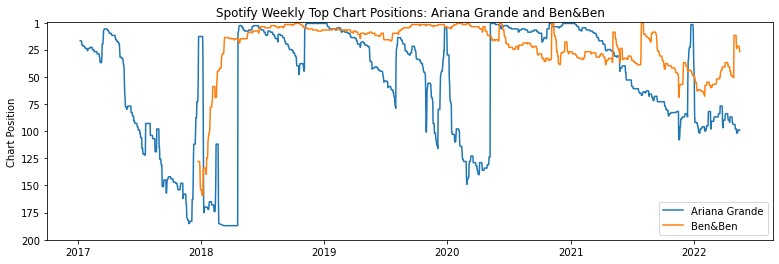

In [9]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)

artists = ('Ariana Grande','Ben&Ben')
#####################
#artist 1
#get top position of all charting songs of the artist per day
data1 = charts_df[charts_df['artist']==artists[0]].groupby('date')[['position']].min()
#get rolling 7 day minimum of top daily positions
data1 = data1.rolling(7).min()

#####################
#artist 2
data2 = charts_df[charts_df['artist']==artists[1]].groupby('date')[['position']].min()
data2 = data2.rolling(7).min()

plt.plot(data1, label=artists[0])
plt.plot(data2, label=artists[1])

#reverse the yaxis to show 1 on top
plt.ylim([200,0])
plt.yticks([1]+np.arange(25,201,25).tolist())
#
plt.legend(loc='lower right')
plt.ylabel('Chart Position')
plt.title('Spotify Weekly Top Chart Positions: %s and %s' % artists)

>Q: What insights can you infer from the chart above?

Q: Compare the 7-day *mean* total streams of Ben & Ben and Ariana Grande

Text(0.5, 1.0, 'Spotify Weekly Total Streams: Ariana Grande and Ben&Ben')

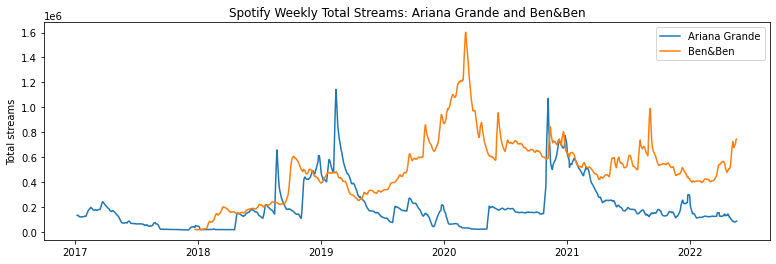

In [10]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)


artists = ('Ariana Grande','Ben&Ben')
#####################
#artist 1
#get top position of all charting songs of the artist per day
data1 = charts_df[charts_df['artist']==artists[0]].groupby('date')[['streams']].sum()
#get rolling 7 day mean of top daily positions
data1 = data1.rolling(7).mean()

#####################
#artist 2
data2 = charts_df[charts_df['artist']==artists[1]].groupby('date')[['streams']].sum()
data2 = data2.rolling(7).mean()

plt.plot(data1, label=artists[0])
plt.plot(data2, label=artists[1])

plt.legend()
plt.ylabel('Total streams')
plt.title('Spotify Weekly Total Streams: %s and %s' % artists)

>Q: What insights can you infer from the chart above?

### 3. Interactive time series plot in Bokeh


In [ ]:
# Standard imports 
from bokeh.io import output_notebook, show
from bokeh.plotting import figure, output_file, save

from bokeh.models.tools import HoverTool
from bokeh.models import Legend
from bokeh.models import ColumnDataSource, Range1d
output_notebook()

>Q: Compare the contribution of the top 1-50 tracks vs top 50-200 tracks in the yearly streams of Spotify

In [ ]:
#add is_in_top_50 column in df
df = charts_df.copy()
df['is_in_top50']=df['position']<=50
df = df.set_index('date')
df.head()

In [ ]:
#get total yearly streams
yr_df = df.groupby('is_in_top50')[['streams']].resample('Y').sum().reset_index()
yr_df = yr_df.set_index('date')
yr_df

In [ ]:
#initialize plot
p = figure(title="Spotify Yearly Streams for Charting Tracks",plot_width=500, plot_height=300)
#plot glyphs - vertical bar
#top 1-50
data = yr_df[yr_df['is_in_top50']==True]
b1 = p.vbar(x=data.index.year.values-0.15,\
       top=data['streams'].values/1000000000,
       width=0.2, bottom=0, color="crimson",  muted_alpha=0.2)
#top 50-200
data = yr_df[yr_df['is_in_top50']==True]
b2 = p.vbar(x=data.index.year.values+0.15,\
       top=data['streams'].values/1000000000,
       width=0.2, bottom=0, color="dodgerblue", muted_alpha=0.2)
#set plot parameters
#axis
p.xaxis.axis_label = 'date'
p.yaxis.axis_label = 'Streams (in billions)'
#legend
p.legend.label_text_font_size = '8pt'
p.legend.click_policy="hide"

show(p)

In [ ]:
#initialize plot
p = figure(title="Spotify Yearly Streams for Charting Tracks",plot_width=500, plot_height=300)
data = yr_df

legend_labels = ['Top50','Top51-200']
legend_it = []
#plot glyphs - vertical bar

#top 1-50
data = yr_df[yr_df['is_in_top50']==True]
b1 = p.vbar(x=data.index.year.values-0.15,\
       top=data['streams'].values/1000000000,
       width=0.2, bottom=0, color="crimson",  muted_alpha=0.2)
#top 50-200
data = yr_df[yr_df['is_in_top50']==True]
b2 = p.vbar(x=data.index.year.values+0.15,\
       top=data['streams'].values/1000000000,
       width=0.2, bottom=0, color="dodgerblue", muted_alpha=0.2)

#set plot parameters
#legend, out of plot area
legend_it = list(zip(legend_labels,[[b1],[b2]]))
legend = Legend(items=legend_it)
p.add_layout(legend, 'right')
p.legend.click_policy="mute"

#axis
p.xaxis.axis_label = 'date'
p.yaxis.axis_label = 'Streams (in billions)'

show(p)

>Q: What insights can you infer from the chart above?

Convert the time series static plots into Bokeh charts

In [ ]:
#Simple time series plot with Viz
from bokeh.models import Range1d
#initialize plot
p = figure(x_axis_type="datetime", title="Spotify Daily Charts", plot_height=350, plot_width=800)
#set parameters
p.xgrid.grid_line_color=None
p.ygrid.grid_line_alpha=0.5
p.xaxis.axis_label = 'date'
p.yaxis.axis_label = 'Position'
p.y_range.flipped = True
p.y_range=Range1d(200,0.5)

p.yaxis.ticker = [1,50,100,150,200]
#p.xaxis.major_label_overrides = {1: 'A', 2: 'B', 3: 'C'}

#loop over data, filter and plot glyph-line
artists = ['Ariana Grande','Ben&Ben']
colors=['orange','blue']
for n,artist in enumerate(artists):
    artist_df = pd.DataFrame({'date':pd.unique(df.index)}).set_index('date')
    positions = df[df['artist']==artist].groupby('date')[['position']].min().rolling(7).min()
    artist_df['position'] = positions
    artist_df = artist_df.reset_index()
    
    #can add .flatten() to y-values to deal with rolling window value nesting
    p.line(artist_df['date'], artist_df['position'], color=colors[n],legend_label=artist)
    

p.legend.location = "bottom_right"
p.legend.click_policy="hide"

show(p)

In [ ]:
#Simple time series plot with selectable legend and hover output

p = figure(x_axis_type="datetime", title="Spotify Daily Charts", plot_height=350, plot_width=800)

#reformat data to suit ColumnDataSource
#loop over data, filter and plot glyph-line
artists = ['Ariana Grande','Ben&Ben']
colors=['blue','orange','red']
for n,artist in enumerate(artists):
    artist_df = pd.DataFrame({'date':pd.unique(df.index)}).set_index('date')
    top5songs = df[(df['artist']==artist)].groupby(['track_name'])[['streams']].sum()\
                                            .sort_values(by='streams', ascending=False)[:5].reset_index()['track_name']
    positions = df[(df['artist']==artist)&(df['track_name'].isin(top5songs))].groupby('date')[['position']].min().rolling(7).min()
    artist_df['position'] = positions
    artist_df = artist_df.reset_index()
    artist_df['artist'] = artist
    #declare as column data source for hover
    source = ColumnDataSource(data = {'date': artist_df['date'].values,
                                      'position': artist_df['position'].values,
                                      'artist': artist_df['artist'].values})
    #plot glyph-line
    #add .flatten() to y-values to deal with rolling window value nesting
    p.line(x='date', y='position', color=colors[n], source=source, legend_label=artist)
    #add hover tool
    p.add_tools(HoverTool(
        tooltips=[
                ( 'date',   '@date{%F}'),
                ( 'position',  '@position' ), # use @{ } for field names with spaces
                ( 'artist', '@artist'      ),
            ],
        formatters={
            '@date' : 'datetime',
        }
    ))

#plot formatting parameters
p.xgrid.grid_line_color=None
p.ygrid.grid_line_alpha=0.5
p.xaxis.axis_label = 'date'
p.yaxis.axis_label = 'Position'
p.y_range.flipped = True
p.y_range=Range1d(200,0)
p.yaxis.ticker = [1,50,100,150,200]

p.legend.location = "bottom_right"
p.legend.click_policy="hide"
show(p)

In [ ]:
#save most recent plot
output_file('figs/position_plot.html', mode='inline')
save(p)

## Try it yourself!

1. Among those included in the Spotify charts, pick 1 artist you like to analyze. 

   a. Plot the streams and positions of their top 5 streamed songs.
   
   b. Compare these charts with streams and positions of what you feel to be a possible collaborator/competitor/related artist. 

   What insights can you draw from the data?